In [11]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779915/fs_task1_10f.csv')

In [3]:
cat_features = ['target']

In [4]:
X = df.drop(['target'], axis=1, errors='ignore')

In [5]:
y = df['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = CatBoostClassifier(random_state=42,
                           cat_features=[],
                           thread_count=-1
                           )

In [8]:
model.fit(X_train, 
          y_train, 
          eval_set=(X_test, y_test), 
          verbose=100, 
          plot=False, 
          early_stopping_rounds=100)

Learning rate set to 0.10885
0:	learn: 1.9397215	test: 1.9473294	best: 1.9473294 (0)	total: 141ms	remaining: 2m 20s
100:	learn: 0.4678663	test: 0.6483020	best: 0.6483020 (100)	total: 835ms	remaining: 7.43s
200:	learn: 0.3304501	test: 0.6373796	best: 0.6366906 (199)	total: 1.44s	remaining: 5.7s
300:	learn: 0.2467960	test: 0.6428317	best: 0.6361299 (254)	total: 2.02s	remaining: 4.7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6361299133
bestIteration = 254

Shrink model to first 255 iterations.


In [9]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,feature_1,32.490151
1,feature_9,29.112944
2,feature_8,12.172454
3,feature_2,4.631686
4,feature_6,4.100450
5,feature_7,3.807930
6,feature_5,3.795735
7,feature_4,3.491490
8,feature_3,3.473900
9,feature_0,2.923259


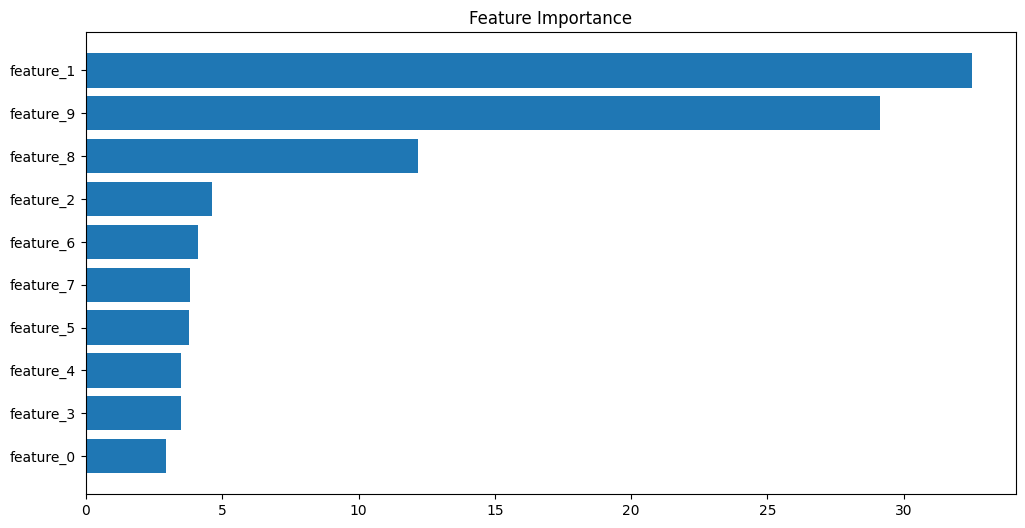

In [13]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance');

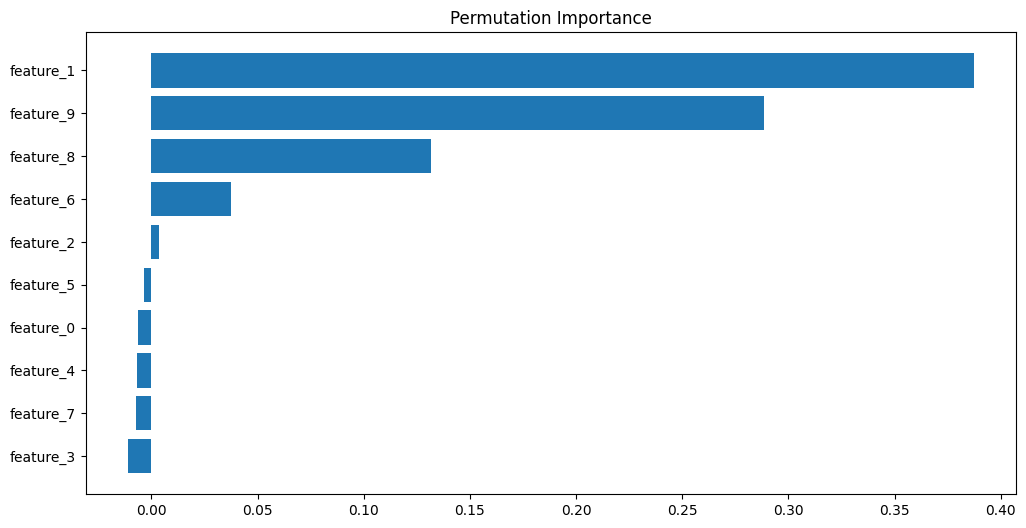

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Permutation Importance');